In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')

In [11]:
# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)


In [12]:
df

,beta,exponential,normal_p,normal_l
0,55.496409,21.186603,8.076786,14.885724
1,50.451966,1.816198,9.029415,12.725882
2,54.010968,19.455417,9.693630,3.037604
3,47.248391,6.483512,10.929271,-4.489113
4,25.174327,23.695081,8.005287,6.472528
...,...,...,...,...
995,54.237469,2.611342,16.071515,4.479270
996,36.702599,2.640401,10.472276,1.213212
997,58.885002,0.858975,7.579586,-10.481226
998,53.787795,6.071335,7.256475,-10.573573


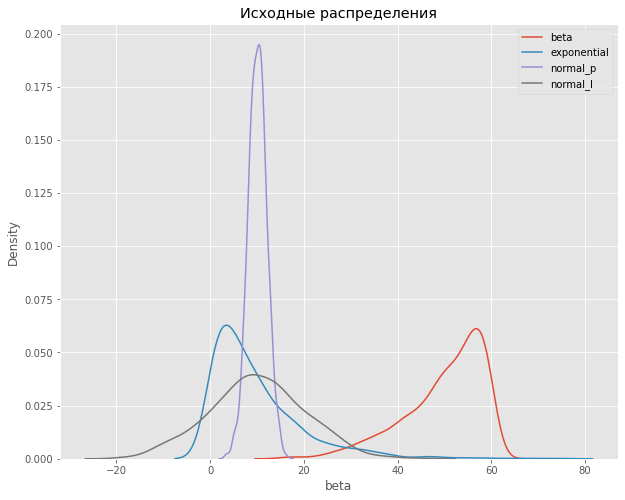

In [15]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [16]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.913220,9.889840,10.110751,10.100057
std,8.522686,9.926640,1.978261,10.216544
min,16.007395,0.011331,3.405133,-18.906496
25%,45.358166,2.817181,8.793591,3.456154
50%,52.118864,6.942297,10.107844,9.910360
75%,56.552100,13.365313,11.409568,16.690878
max,59.980743,74.084307,16.245208,44.569319


### MINMAXSCALER

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

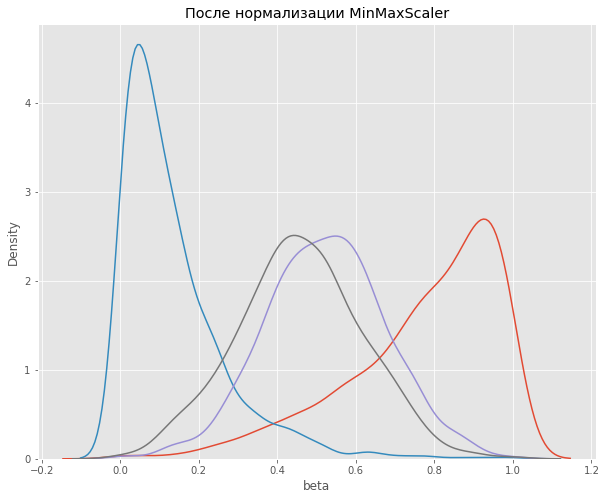

In [20]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [19]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.771054,0.133362,0.522241,0.456970
std,0.193815,0.134012,0.154069,0.160952
min,0.000000,0.000000,0.000000,0.000000
25%,0.667467,0.037880,0.419659,0.352302
50%,0.821213,0.093569,0.522015,0.453982
75%,0.922029,0.180281,0.623395,0.560802
max,1.000000,1.000000,1.000000,1.000000


### ROBUSTSCALER

<AxesSubplot:title={'center':'Рапсределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

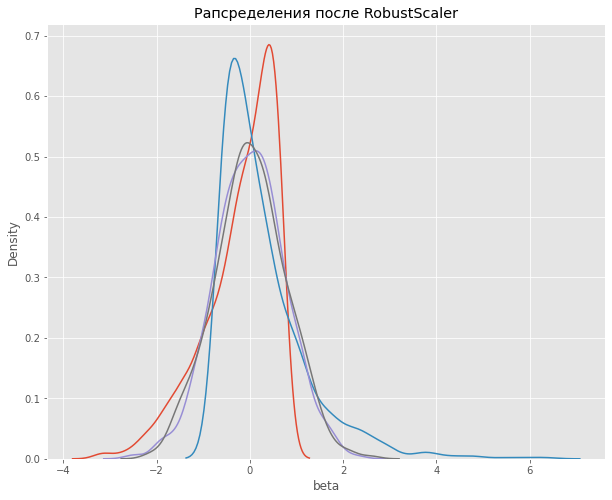

In [22]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Рапсределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [23]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,-0.197039,0.279437,1.111374e-03,0.014333
std,0.761366,0.941080,7.562226e-01,0.771950
min,-3.225985,-0.657080,-2.562221e+00,-2.177367
25%,-0.603961,-0.391075,-5.023948e-01,-0.487672
50%,0.000000,0.000000,3.395179e-16,0.000000
75%,0.396039,0.608925,4.976052e-01,0.512328
max,0.702334,6.365299,2.346108e+00,2.618790


### СТАНДАРТИЗАЦИЯ

#### STANDARDSCALER

<AxesSubplot:title={'center':'Распределение после StandardScaler'}, xlabel='beta', ylabel='Density'>

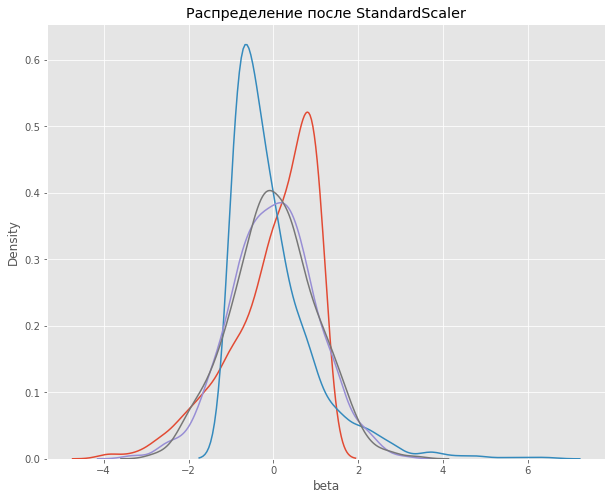

In [24]:
s_scaler = preprocessing.StandardScaler()

df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Распределение после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)


In [25]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,9.383605e-16,-6.483702e-17,-3.499423e-16,1.332268e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.980293e+00,-9.956493e-01,-3.391349e+00,-2.840595e+00
25%,-5.347296e-01,-7.128492e-01,-6.661506e-01,-6.506336e-01
50%,2.589263e-01,-2.970811e-01,-1.470374e-03,-1.857686e-02
75%,7.793555e-01,3.502910e-01,6.568731e-01,6.454354e-01
max,1.181853e+00,6.470124e+00,3.102486e+00,3.375555e+00
